In [108]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from os import path as osp
import os
import Regression as reg
from sklearn.linear_model import LinearRegression
import random
import itertools

In [2]:
path2csv = "D:\Work\Sampling_attetion\Azadeh_data\\data\\"
RegBetascsv = "D:\\Work\\Sampling_attetion\\Azadeh_data\\result\\result.csv"
inst = ['nat','health','desire']
DV = "Choice" 

In [75]:
dirList = os.listdir(path2csv)

In [76]:
# for i in range(len(dirList)):
#     data = pd.read_excel(path2csv + dirList[i])
#     Y = data.choice
#     Y[Y == 1] = 1
#     Y[Y == 2] = 1
#     Y[Y == -1] = 0
#     Y[Y == -2] = 0
#     print(np.sum(Y == 0))

In [77]:
data = pd.read_excel(path2csv + dirList[-1])


In [78]:
Y = data.choice
Y[Y == 1] = 1
Y[Y == 2] = 1
Y[Y == -1] = 0
Y[Y == -2] = 0
print(np.sum(Y == 0))

200


<ipython-input-78-a4a94584ee17>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[Y == 1] = 1
<ipython-input-78-a4a94584ee17>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[Y == 2] = 1
<ipython-input-78-a4a94584ee17>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[Y == -1] = 0
<ipython-input-78-a4a94584ee17>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the doc

In [103]:
decsion = []
sample_num = 4
p = 0.6
decision_criteria = 3.1
for trial in range(data.shape[0]):
    diff = data.taste[trial] - data.health[trial]
    for sample in range(sample_num):    
        if diff >= 0:
            samples = [data.taste[trial] if random.uniform(0, 1) >= p else data.health[trial] for i in range(sample_num)]

        else:
            samples = [data.health[trial] if random.uniform(0, 1) >= p else data.taste[trial] for i in range(sample_num)]

    decsion.append(1 if np.mean(samples) > decision_criteria else 0)

print(np.sum(Y == decsion))

392


print(np.sum(Y == 0))

In [164]:
# d = {'sub_num': [], 'Sample_num': [], 'P': [], 'Decision_criteria': [], 'Correct': []}
# df = pd.DataFrame(data=d)
result = []
for i in range(len(dirList)):
    
    print(i)
    data = pd.read_excel(path2csv + dirList[i])
    sample_nums = [2, 3, 4]
    ps = [0.5, 0.6, 0.7, 0.8, 0.9]
    decision_criterias = [2.5, 3, 3.1, 3.25, 3.4, 3.5, 3.8, 4, 4.5]
    Y = data.choice
    Y[Y == 1] = 1
    Y[Y == 2] = 1
    Y[Y == -1] = 0
    Y[Y == -2] = 0

    for sample_num, p, decision_criteria in itertools.product(sample_nums, ps, decision_criterias):
        
        decsion = []


        for trial in range(data.shape[0]):
            diff = data.taste[trial] - data.health[trial]
            for sample in range(sample_num):    
                if diff >= 0:
                    samples = [data.taste[trial] if random.uniform(0, 1) >= p else data.health[trial] for i in range(sample_num)]

                else:
                    samples = [data.health[trial] if random.uniform(0, 1) >= p else data.taste[trial] for i in range(sample_num)]

            decsion.append(1 if np.mean(samples) > decision_criteria else 0) # TODO sum insted of mean

        
        
        result.append([i, sample_num, p, decision_criteria, np.sum(Y == decsion)])

0


<ipython-input-164-b4494f7e8cd4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[Y == 1] = 1
<ipython-input-164-b4494f7e8cd4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[Y == 2] = 1
<ipython-input-164-b4494f7e8cd4>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Y[Y == -1] = 0
<ipython-input-164-b4494f7e8cd4>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


KeyboardInterrupt: 

In [166]:
df = pd.DataFrame(result, columns = ['sub_num', 'Sample_num', 'P', 'Decision_criteria', 'Correct'])
idx = df.groupby(['sub_num'])['Correct'].transform(max) == df['Correct']
df_final = df[idx]

(array([11.,  0.,  0.,  0.,  0., 11.,  0.,  0.,  0., 24.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 10 Patch objects>)

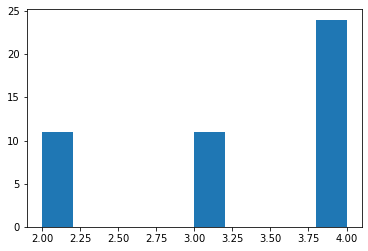

In [169]:
plt.hist(df_final['Sample_num'])

(array([ 4.,  0.,  7.,  0.,  0.,  5.,  0.,  7.,  0., 23.]),
 array([0.5 , 0.54, 0.58, 0.62, 0.66, 0.7 , 0.74, 0.78, 0.82, 0.86, 0.9 ]),
 <a list of 10 Patch objects>)

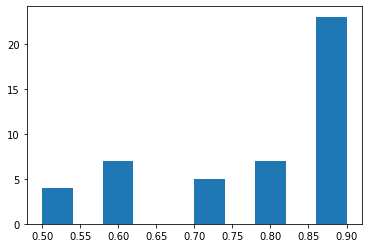

In [170]:
plt.hist(df_final['P'])

(array([ 2.,  0.,  1.,  3.,  3.,  3.,  3., 10.,  0., 21.]),
 array([2.5, 2.7, 2.9, 3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.5]),
 <a list of 10 Patch objects>)

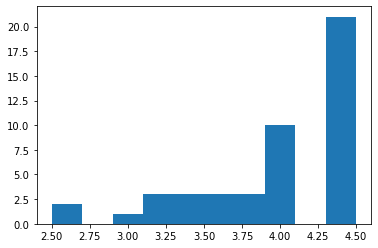

In [171]:
plt.hist(df_final['Decision_criteria'])